# Removing hard shadows from images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

In [ ]:
original_img = cv2.imread('MangoLeavesDatabase/chausa/front/chausa_front_iyd0ijcw5vwhkkaka7d8g07j.jpg')
# Convert color channels from BGR to RGB
img2rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

## Read an Image from dataset

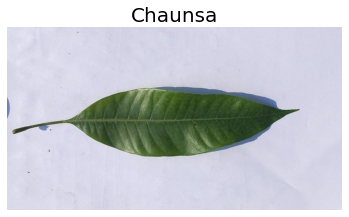

In [2]:
# Display Original Image
plt.axis('off')
plt.title('Original Image', fontsize=18)
plt.imshow(img2rgb)

## Apply K-Means to reduce color space in image

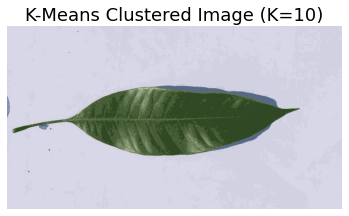

In [3]:
img_pixels = np.float32(img2rgb.reshape((-1, 3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10 # no of clusters
ret,labels,centers = cv2.kmeans(img_pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
cluster_img = centers[labels.flatten()]
img_after_kmeans = cluster_img.reshape(img2rgb.shape)
# Display K Means Clustered Image
plt.axis('off')
plt.title('K-Means Clustered Image (K=10)', fontsize=18)
plt.imshow(img_after_kmeans)

## Change all shadow bluish pixels to white in clustered image

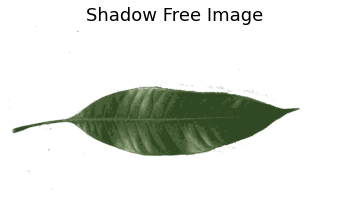

In [4]:
for i,p in enumerate(cluster_img):
    max_intensity = max(p)
    if max_intensity == p[2]:
        cluster_img[i] = [255, 255, 255]
cluster_img = cluster_img.reshape(img2rgb.shape)
# Display shadow free image
plt.axis('off')
plt.title('Shadow Free Image', fontsize=18)
plt.imshow(cluster_img)

## Create binary threshold map from shadow free clustered image

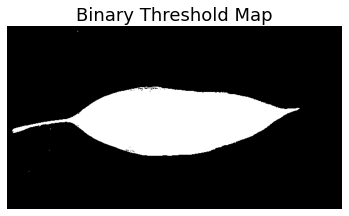

In [5]:
cluster_img2gray = cv2.cvtColor(cluster_img, cv2.COLOR_RGB2GRAY)
retval, th_img = cv2.threshold(cluster_img2gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Display Threshold map
plt.axis('off')
plt.title('Binary Threshold Map', fontsize=18)
plt.imshow(th_img, cmap='gray')

## Apply binary threshold map to original rgb image by bitwise AND operation

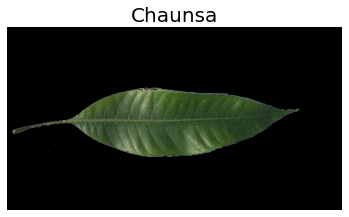

In [6]:
img = np.bitwise_and(img2rgb, cv2.cvtColor(th_img, cv2.COLOR_GRAY2RGB))
# Display preprocessed image
plt.axis('off')
plt.title('Preprocessed Image', fontsize=18)
plt.imshow(img)